# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [16]:
import pandas as pd

# Load the data from the uploaded files
cast_df = pd.read_csv('cast.csv')
release_dates_df = pd.read_csv('release_dates.csv')
titles_df = pd.read_csv('titles.csv')

# Truncating nonsensical data where year is greater than 2025
truncated_titles_df = titles_df[titles_df['year'] > 2025]

# Display the truncated DataFrame
truncated_titles_df.head(), truncated_titles_df.shape

(                           title  year
 60046                  100 Years  2115
 125751  The Zero Century: Maetel  2026,
 (2, 2))

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [17]:
# Displaying the first few rows and basic information of each dataframe
data_summary = {
    "cast": {"preview": cast_df.head(), "info": cast_df.info()},
    "release_dates": {"preview": release_dates_df.head(), "info": release_dates_df.info()},
    "titles": {"preview": titles_df.head(), "info": titles_df.info()}
}

data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 no

{'cast': {'preview':                   title  year      name   type                character     n
  0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
  1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
  2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
  3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
  4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN,
  'info': None},
 'release_dates': {'preview':                     title  year      country        date
  0   #73, Shaanthi Nivaasa  2007        India  2007-06-15
  1                   #BKKY  2016     Cambodia  2017-10-12
  2                 #Beings  2015      Romania  2015-01-29
  3               #Captured  2017          USA  2017-09-05
  4  #Ewankosau saranghaeyo  2015  Philippines  2015-01-21,
  'info': None},
 'titles': {'preview':                       title  year
  0           Ankara ekspr

### 2. How many movies have the title North by Northwest

In [18]:
north_by_northwest_count = titles_df[titles_df['title'] == 'North by Northwest'].shape[0]
north_by_northwest_count

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [68]:
# Filtering the titles_df DataFrame for movies titled "Hamlet"
hamlet_df = titles_df[titles_df['title'].str.lower() == 'hamlet']

# Counting versions of "Hamlet" and finding the earliest and latest production years
hamlet_count = hamlet_df.shape[0]
first_hamlet_year = hamlet_df['year'].min()
last_hamlet_year = hamlet_df['year'].max()

print(" Version Count of Hamlet Movies:", hamlet_count, "\n","Year of First Hamlet Movie","\n",first_hamlet_year, "Year of Last Malet Movie",last_hamlet_year)

 Version Count of Hamlet Movies: 20 
 Year of First Hamlet Movie 
 1910 Year of Last Malet Movie 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [20]:
treasure_island_df = titles_df[titles_df['title'].str.lower() == 'treasure island'].sort_values('year')

# Display the sorted list
treasure_island_df

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [26]:
# Counting the number of movies made in the years 1950, 1980, and 2000
# In conclusion based on the analytical results of movies being made at different time frames the number over movies made has consistently increasing 
# and it has doubled when comparing movies made in the 1950 vs. movies made in 2000.

movies_1950_count = titles_df[titles_df['year'] == 1950].shape[0]
movies_1980_count = titles_df[titles_df['year'] == 1980].shape[0]
movies_2000_count = titles_df[titles_df['year'] == 2000].shape[0]

print (" Movies Made in 1950 = ",movies_1950_count,"\n", "Movies Made in 1980 = ",movies_1980_count,"\n","Movies Made in 2000 = ", movies_2000_count)

 Movies Made in 1950 =  1109 
 Movies Made in 1980 =  1750 
 Movies Made in 2000 =  2568


### 6. How big was the cast of Metropolis


In [70]:
# Counting the number of cast members in the movie "Metropolis"
metropolis_cast_count = cast_df[cast_df['title'].str.lower() == 'metropolis'].shape[0]
print ("The cast of movie Metropolis was:",metropolis_cast_count)

The cast of movie Metropolis was: 33


In [28]:
# Filtering the DataFrame for the movie "Metropolis"
metropolis_cast = cast_df[cast_df['title'].str.lower() == 'metropolis']

# Displaying the names of the cast members for movie Metropolis
print(metropolis_cast[['name']])

                        name
3416             Alfred Abel
26389          Fritz Alberti
193089       Erwin Biswanger
542995            Max Dietze
709318       Gustav Fröhlich
747304       Heinrich George
789295        Heinrich Gotho
1015520           Georg John
1110313   Rudolf Klein-Rogge
1141892        Walter Kuehle
1246757         Theodor Loos
1719286           Fritz Rasp
1734020      Hanns Leo Reich
1736598     Arthur Reinhardt
1935963         Curt Siodmak
2006109           Olaf Storm
2145535          Erwin Vater
2172908        Rolf von Goth
2402830         Grete Berger
2422158         Olly Boeheim
2658590           Ellen Frey
2672124       Beatrice Garga
2709135           Dolly Grey
2748716        Brigitte Helm
2748717        Brigitte Helm
2759815          Anny Hintze
2881041     Margarete Lanner
2881042     Margarete Lanner
2908248    Rose Lichtenstein
3256276    Henrietta Siodmak
3373844  Helen von Münchofen
3391926        Helene Weigel
3413805     Hilde Woitscheff


### 7. How many roles for actors were there 1950's? 1990's

In [13]:
# Counting the number of roles for actors in the 1950s and 1990s
roles_1950s = cast_df[(cast_df['year'] >= 1950) & (cast_df['year'] <= 1959) & (cast_df['type'] == 'actor')].shape[0]
roles_1990s = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] <= 1999) & (cast_df['type'] == 'actor')].shape[0]

roles_1950s, roles_1990s

(153559, 245713)

### 8. How many roles for actors & actresses over time? Output should be a line graph

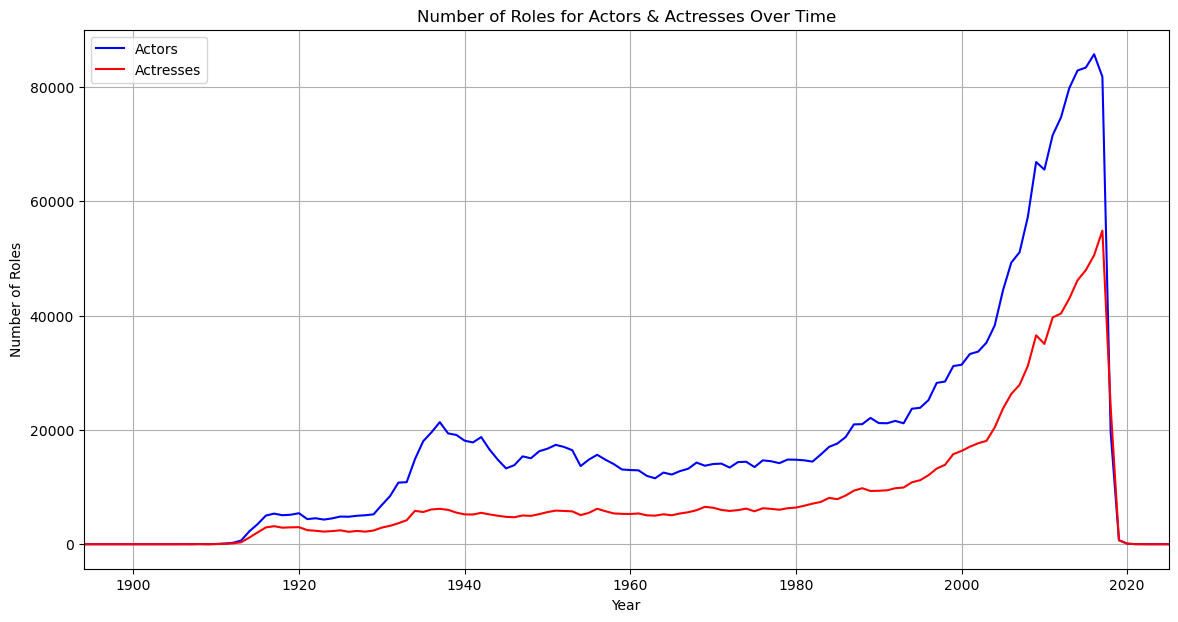

In [72]:
import matplotlib.pyplot as plt

# Truncating nonsensical data where year is greater than 2025
truncated_titles_df = cast_df[cast_df['year'] > 2025]

# Count/ group by the number of roles for actors and actresses over time
roles_by_year = cast_df.groupby(['year', 'type']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(roles_by_year.index, roles_by_year['actor'], label='Actors', color='blue')
plt.plot(roles_by_year.index, roles_by_year['actress'], label='Actresses', color='red')
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
# Limiting the x-axis up to 2025
plt.xlim(left=roles_by_year.index.min(), right=2025)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [30]:
# Filter for leading roles in the year 2000
leading_roles_2000 = cast_df[(cast_df['year'] == 2000) & (cast_df['n'] == 1)]

# Count the number of leading roles
leading_role_count = leading_roles_2000.shape[0]

print(f"Number of leading roles in the year 2000: {leading_role_count}")

Number of leading roles in the year 2000: 1890


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [73]:
# Filter data for roles with no ranking ('n' is NaN) in the 2000s and 1950s
# In conclusion, there are a lot more movies with no ranking in the 2000's era than in the 1950's. 
# Perhaps worth saying the quality of the movies may have gone donw as quantity has increased.

no_rank_2000s = cast_df[(cast_df['year'] // 10 == 200) & (cast_df['n'].isna())]
no_rank_1950s = cast_df[(cast_df['year'] // 10 == 195) & (cast_df['n'].isna())]

# Count the number of such roles
no_rank_count_2000s = no_rank_2000s.shape[0]
no_rank_count_1950s = no_rank_1950s.shape[0]

print(" Movies with no Rank in the 2000's",no_rank_count_2000s,"\n", "Movies with no Rank in the 1950's", no_rank_count_1950s)

 Movies with no Rank in the 2000's 232037 
 Movies with no Rank in the 1950's 95406


### 11. Plot the number of films made in each decade

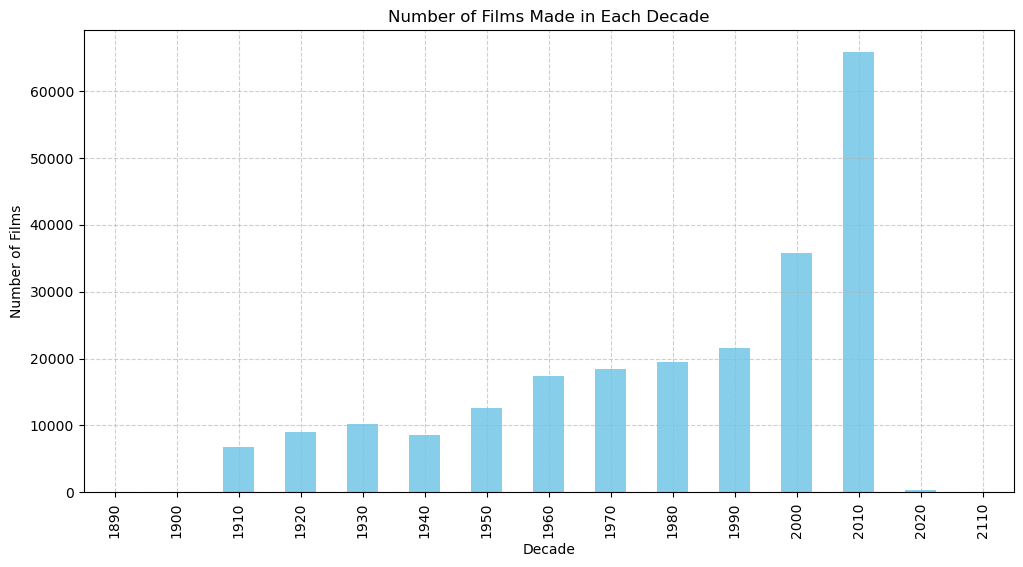

In [78]:
import matplotlib.pyplot as plt

# Truncating nonsensical data where year is greater than 2025
truncated_titles_df = titles_df[titles_df['year'] > 2025]

# Calculate the number of films per decade
titles_df['decade'] = (titles_df['year'] // 10) * 10  # Floor division to find the decade
decade_counts = titles_df['decade'].value_counts().sort_index()

# Plot the number of films per decade
plt.figure(figsize=(12, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 12. Plot the number of films with a Rustler character over time

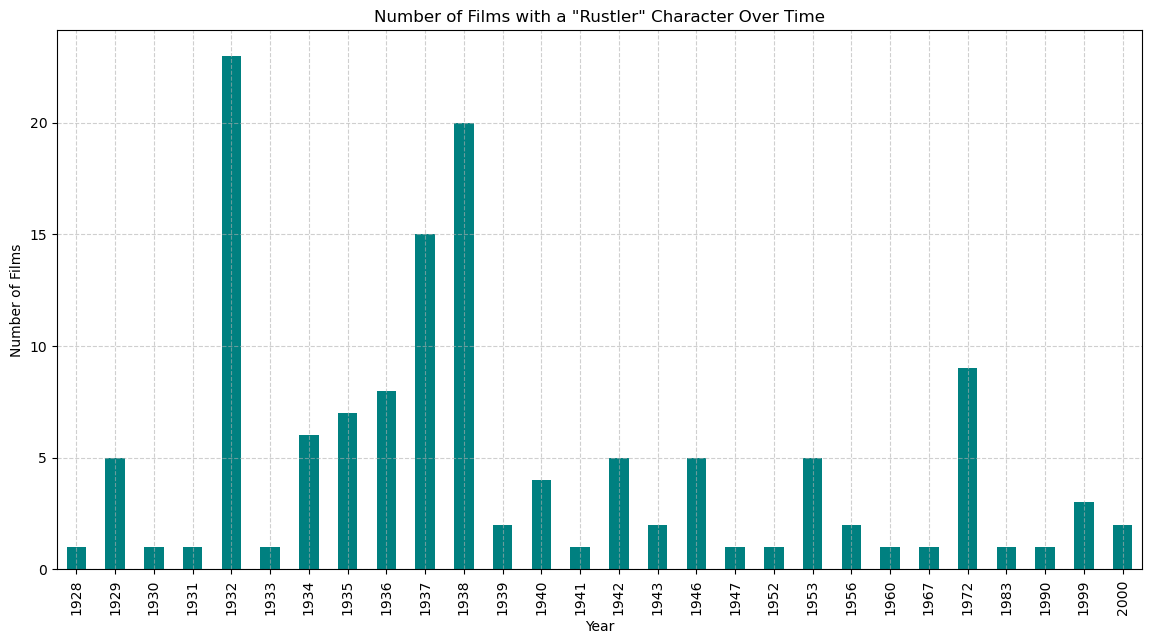

In [36]:
# Filter for entries where the character is named "Rustler"
rustler_films = cast_df[cast_df['character'].str.lower() == 'rustler']

# Count the number of films per year featuring a Rustler
rustler_films_count = rustler_films['year'].value_counts().sort_index()

# Plot the number of films with a Rustler character over time
plt.figure(figsize=(14, 7))
rustler_films_count.plot(kind='bar', color='teal')
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 13. What are the top ten character names of all time?

In [38]:

# Calculate the top ten most frequent character names
top_characters = cast_df['character'].value_counts().head(10)

top_characters

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [41]:
# Filter data for the 1990s
nineties_data = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] < 2000)]

# Find the actor with the most film appearances in the 1990s
most_active_actor_1990s = nineties_data['name'].value_counts().idxmax()
most_films_count_1990s = nineties_data['name'].value_counts().max()

most_active_actor_1990s, most_films_count_1990s

('Shakti Kapoor', 143)

### 15. What are the top 10 roles that start with Science?

In [42]:
# Filter for character names starting with "Science"
science_roles = cast_df[cast_df['character'].str.startswith('Science', na=False)]

# Find the top 10 most common science roles
top_science_roles = science_roles['character'].value_counts().head(10)

top_science_roles

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [79]:
# Group by film title and count the number of cast entries for each film
film_cast_sizes = cast_df['title'].value_counts()

# Find the film with the largest cast
largest_cast_film = film_cast_sizes.idxmax()
largest_cast_size = film_cast_sizes.max()

print (" The film with the largest cast is:",largest_cast_film,"\n","The film had a cast of:",largest_cast_size)

 The film with the largest cast is: Around the World in 80 Days 
 The film had a cast of: 1364


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [51]:
# Calculate the cast size per film
cast_size_per_film = cast_df['title'].value_counts()

# Generate descriptive statistics for cast size
cast_size_statistics = cast_size_per_film.describe()

cast_size_statistics


count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: count, dtype: float64

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [53]:
# Filter data for Natalie Portman
natalie_portman_films = cast_df[cast_df['name'].str.lower() == 'natalie portman']

# Count the number of films per year
natalie_portman_yearly_films = natalie_portman_films['year'].value_counts().sort_index()

natalie_portman_yearly_films

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
Name: count, dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [55]:
# Filter data for Natalie Portman and for top or co-starring roles
natalie_top_roles = cast_df[(cast_df['name'].str.lower() == 'natalie portman') & (cast_df['n'] <= 2)]

# Count the number of such films per year
natalie_top_roles_yearly = natalie_top_roles['year'].value_counts().sort_index()

natalie_top_roles_yearly

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
Name: count, dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Figure size 1200x800 with 0 Axes>

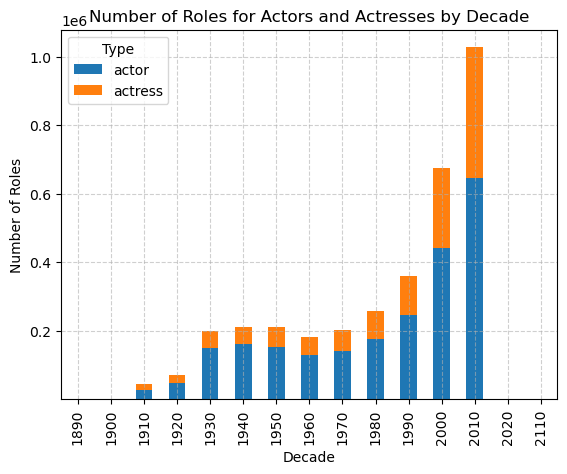

In [56]:
# Calculate the decade for each film
cast_df['decade'] = (cast_df['year'] // 10) * 10

# Group by decade and type, and count the number of roles
roles_by_decade_type = cast_df.groupby(['decade', 'type']).size().unstack()

# Plot the results
plt.figure(figsize=(12, 8))
roles_by_decade_type.plot(kind='bar', stacked=True)
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Type')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [81]:
# Convert 'date' to datetime format
release_dates_df['date'] = pd.to_datetime(release_dates_df['date'])

# Extract day of the week and month from the date
release_dates_df['day_of_week'] = release_dates_df['date'].dt.day_name()
release_dates_df['month'] = release_dates_df['date'].dt.month_name()
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
release_dates_df['month'] = pd.Categorical(release_dates_df['month'], categories=months_order, ordered=True)

# Create a pivot table to summarize data
pivot_table = pd.pivot_table(release_dates_df, index='day_of_week', columns='month', aggfunc='size', fill_value=0)

# Reorder the days of the week to start from Monday to Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

pivot_table

C:\Users\dallvo genti\AppData\Local\Temp\ipykernel_17756\2090629204.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(release_dates_df, index='day_of_week', columns='month', aggfunc='size', fill_value=0)


month,January,February,March,April,May,June,July,August,September,October,November,December
day_of_week,,,,,,,,,,,,
Monday,3699,3138,3383,3168,3050,2337,2267,2844,3161,3551,3372,3240
Tuesday,1823,1190,1313,1446,1377,1179,1144,1121,1309,1542,1415,1903
Wednesday,4663,4118,4479,4650,4289,4282,4243,4270,4161,4605,4582,5097
Thursday,10746,10356,11844,10625,10100,9469,8947,9931,10713,11490,10859,10666
Friday,13734,13833,15268,13559,13198,11997,11635,13430,14523,14893,14084,13020
Saturday,2925,2395,2742,2868,2270,2409,2291,2277,2551,2700,2547,3357
Sunday,1822,1277,1228,1358,1165,1031,894,1138,1332,1423,1342,1813


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

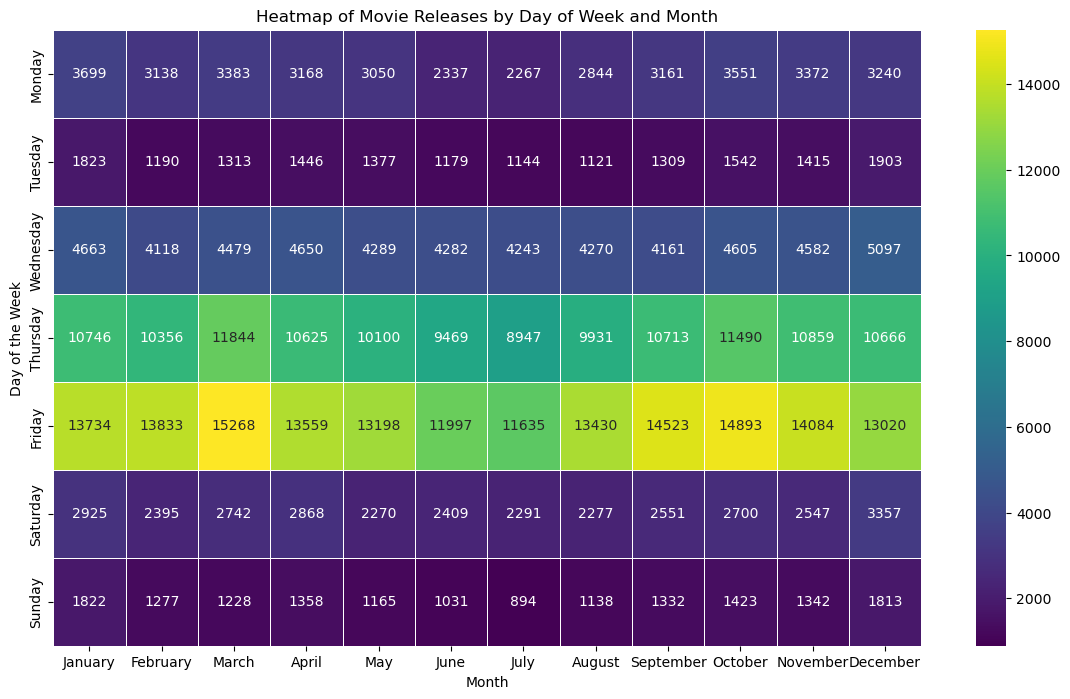

In [82]:
# For this exercise I used ChatGPT to help me with the syntax errors as well as 
# Assuming that the question is refering to the order of the months not being correctly, I fixed it by categorizing the months in the 
# proper order when creating the pivot table. Since the source was corrected then the heatmap reflected the corrected values as well!
# Used assistance from ChatGPT for this exercise
import seaborn as sns

# Plot the heatmap of the pivot table
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Movie Releases by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [59]:
# I used ChatGPT assistance for this exercise as well. Was getting a few syntaxt errors in the begining.

# Filter for actors in "Star Wars" films
star_wars_cast = cast_df[cast_df['title'].str.contains("Star Wars", case=False, na=False)]

# Get unique list of actors from Star Wars
star_wars_actors = star_wars_cast['name'].unique()

# Find other films these actors appeared in
films_with_star_wars_actors = cast_df[cast_df['name'].isin(star_wars_actors) & ~cast_df['title'].str.contains("Star Wars", case=False, na=False)]

# Group by actor and list their films
actor_films = films_with_star_wars_actors.groupby('name')['title'].apply(list).reset_index()

actor_films.head()

,name,title
0,Aaron (IV) Kennedy,"[One Square Mile, Run All Night]"
1,Adam Bareham,[Wilt]
2,Adam Driver,"[Bluebird, Frances Ha, Gayby, Hungry Hearts, I..."
3,Adrian Allan,"[Acquainted, Bridget Jones: The Edge of Reason..."
4,Ahmed Best,"[FDR: American Badass!, Lean on Me, Mother and..."
